In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.ticker as ticker
os.chdir("")

In [2]:
# import csvs from fiji segmentation grouped by condition/channel/replicate/embryo as 'sample'
file_lists={"mcherry-mcitrine_aat_r1_e1":[i for i in glob.glob('d1/mch-mcit_009_aat.csv')],
            "mcherry-mcitrine_aat_r1_e2":[i for i in glob.glob('d1/mch-mcit_011_aat.csv')],
           "mcherry-mcitrine_aat_r1_e3":[i for i in glob.glob('d1/mch-mcit_013_aat.csv')],
           "mcherry-mcitrine_int_r1_e1":[i for i in glob.glob('d1/mch-mcit_009_int.csv')],
            "mcherry-mcitrine_int_r1_e2":[i for i in glob.glob('d1/mch-mcit_011_int.csv')],
           "mcherry-mcitrine_int_r1_e3":[i for i in glob.glob('d1/mch-mcit_013_int.csv')],
           "mcherry+mcitrine_aat_r1_e1":[i for i in glob.glob('d1/mch+mcit_002_aat.csv')],
            "mcherry+mcitrine_aat_r1_e2":[i for i in glob.glob('d1/mch+mcit_004_aat.csv')],
           "mcherry+mcitrine_aat_r1_e3":[i for i in glob.glob('d1/mch+mcit_006_aat.csv')],
           "mcherry+mcitrine_int_r1_e1":[i for i in glob.glob('d1/mch+mcit_002_int.csv')],
            "mcherry+mcitrine_int_r1_e2":[i for i in glob.glob('d1/mch+mcit_004_int.csv')],
           "mcherry+mcitrine_int_r1_e3":[i for i in glob.glob('d1/mch+mcit_006_int.csv')],
            "mcitrine_aat_r1_e1":[i for i in glob.glob('d1/mcit_002_aat.csv')],
            "mcitrine_aat_r1_e2":[i for i in glob.glob('d1/mcit_004_aat.csv')],
           "mcitrine_aat_r1_e3":[i for i in glob.glob('d1/mcit_006_aat.csv')],
           "mcitrine_int_r1_e1":[i for i in glob.glob('d1/mcit_002_int.csv')],
            "mcitrine_int_r1_e2":[i for i in glob.glob('d1/mcit_004_int.csv')],
           "mcitrine_int_r1_e3":[i for i in glob.glob('d1/mcit_006_int.csv')]}

In [3]:
file_lists

{'mcherry-mcitrine_aat_r1_e1': ['d1/mch-mcit_009_aat.csv'],
 'mcherry-mcitrine_aat_r1_e2': ['d1/mch-mcit_011_aat.csv'],
 'mcherry-mcitrine_aat_r1_e3': ['d1/mch-mcit_013_aat.csv'],
 'mcherry-mcitrine_int_r1_e1': ['d1/mch-mcit_009_int.csv'],
 'mcherry-mcitrine_int_r1_e2': ['d1/mch-mcit_011_int.csv'],
 'mcherry-mcitrine_int_r1_e3': ['d1/mch-mcit_013_int.csv'],
 'mcherry+mcitrine_aat_r1_e1': ['d1/mch+mcit_002_aat.csv'],
 'mcherry+mcitrine_aat_r1_e2': ['d1/mch+mcit_004_aat.csv'],
 'mcherry+mcitrine_aat_r1_e3': ['d1/mch+mcit_006_aat.csv'],
 'mcherry+mcitrine_int_r1_e1': ['d1/mch+mcit_002_int.csv'],
 'mcherry+mcitrine_int_r1_e2': ['d1/mch+mcit_004_int.csv'],
 'mcherry+mcitrine_int_r1_e3': ['d1/mch+mcit_006_int.csv'],
 'mcitrine_aat_r1_e1': ['d1/mcit_002_aat.csv'],
 'mcitrine_aat_r1_e2': ['d1/mcit_004_aat.csv'],
 'mcitrine_aat_r1_e3': ['d1/mcit_006_aat.csv'],
 'mcitrine_int_r1_e1': ['d1/mcit_002_int.csv'],
 'mcitrine_int_r1_e2': ['d1/mcit_004_int.csv'],
 'mcitrine_int_r1_e3': ['d1/mcit_006_int

In [4]:
# make dataframe with columns for nucleus (roi), type (NA), pixel coordinates (x/y/z), value (aat/int), filename and sample
data=pd.DataFrame()
for name, items in file_lists.items():
    for csv in items:
        df=pd.read_csv(csv,encoding="utf-8",skiprows=1, usecols=range(2,8),header=None)
        colnames = ["roi", "type", "x", 
                    "y", "z", "value"]
        df.columns=colnames
        df["filename"]=os.path.basename(csv)
        df["sample"]=name
        
        data=data.append(df)

In [5]:
data

,roi,type,x,y,z,value,filename,sample
0,1,0,237.0,143.0,4.0,37.0,mch-mcit_009_aat.csv,mcherry-mcitrine_aat_r1_e1
1,1,0,238.0,143.0,4.0,35.0,mch-mcit_009_aat.csv,mcherry-mcitrine_aat_r1_e1
2,1,0,235.0,144.0,4.0,35.0,mch-mcit_009_aat.csv,mcherry-mcitrine_aat_r1_e1
3,1,0,236.0,144.0,4.0,38.0,mch-mcit_009_aat.csv,mcherry-mcitrine_aat_r1_e1
4,1,0,237.0,144.0,4.0,38.0,mch-mcit_009_aat.csv,mcherry-mcitrine_aat_r1_e1
...,...,...,...,...,...,...,...,...
10193,66,0,44.0,114.0,11.0,634.0,mcit_006_int.csv,mcitrine_int_r1_e3
10194,66,0,45.0,114.0,11.0,600.0,mcit_006_int.csv,mcitrine_int_r1_e3
10195,66,0,46.0,114.0,11.0,645.0,mcit_006_int.csv,mcitrine_int_r1_e3
10196,66,0,47.0,114.0,11.0,553.0,mcit_006_int.csv,mcitrine_int_r1_e3


In [6]:
#melt table to get columns for roi, embryo, repeat (replicate), condition, x/y/z (pixel co-ordinates), raw AAT, intensity
data = data.drop(columns = ["type"])

data[["condition","measure","repeat","embryo"]] = data["sample"].str.split('_',expand = True)
dfmelt = pd.pivot(data,columns=["measure"],values=["value"],index=["roi","embryo","repeat","condition","x","y","z"]).reset_index()
dfmelt.columns = dfmelt.columns.droplevel(0)
dfmelt = dfmelt.rename_axis(None,axis=1)
dfmelt.columns = ["roi","embryo","repeat","condition","x","y","z","raw_aat","int"]

dfmelt

,roi,embryo,repeat,condition,x,y,z,raw_aat,int
0,1,e1,r1,mcherry+mcitrine,4.0,102.0,1.0,36.0,451.0
1,1,e1,r1,mcherry+mcitrine,4.0,103.0,0.0,39.0,297.0
2,1,e1,r1,mcherry+mcitrine,4.0,103.0,1.0,39.0,476.0
3,1,e1,r1,mcherry+mcitrine,4.0,104.0,0.0,36.0,242.0
4,1,e1,r1,mcherry+mcitrine,4.0,104.0,1.0,36.0,484.0
...,...,...,...,...,...,...,...,...,...
117899,150,e3,r1,mcherry+mcitrine,89.0,100.0,6.0,37.0,770.0
117900,150,e3,r1,mcherry+mcitrine,89.0,101.0,6.0,36.0,774.0
117901,150,e3,r1,mcherry+mcitrine,89.0,102.0,6.0,37.0,769.0
117902,150,e3,r1,mcherry+mcitrine,89.0,103.0,6.0,36.0,941.0


In [7]:
#load wrongly segmented nuclei from excel list

notdata = pd.read_csv("d1_rem_obj.csv")
notdata["embryo"]="e"+notdata["embryo"].astype(str)
notdata["repeat"]="r"+notdata["repeat"].astype(str)

notdata

,condition,repeat,embryo,roi
0,mcherry-mcitrine,r1,e1,27
1,mcherry-mcitrine,r1,e1,7
2,mcherry-mcitrine,r1,e1,36
3,mcherry-mcitrine,r1,e1,46
4,mcherry-mcitrine,r1,e1,47
...,...,...,...,...
120,mcherry+mcitrine,r1,e3,2
121,mcherry+mcitrine,r1,e3,91
122,mcherry+mcitrine,r1,e3,34
123,mcherry+mcitrine,r1,e3,118


In [8]:
#remove wrongly segmented nuclei from dataframe

datamelt=pd.merge(dfmelt,notdata,how="left",indicator=True)
datamelt = datamelt.loc[datamelt["_merge"]!="both"]
datamelt = datamelt.drop(columns = "_merge")

datamelt

,roi,embryo,repeat,condition,x,y,z,raw_aat,int
0,1,e1,r1,mcherry+mcitrine,4.0,102.0,1.0,36.0,451.0
1,1,e1,r1,mcherry+mcitrine,4.0,103.0,0.0,39.0,297.0
2,1,e1,r1,mcherry+mcitrine,4.0,103.0,1.0,39.0,476.0
3,1,e1,r1,mcherry+mcitrine,4.0,104.0,0.0,36.0,242.0
4,1,e1,r1,mcherry+mcitrine,4.0,104.0,1.0,36.0,484.0
...,...,...,...,...,...,...,...,...,...
117899,150,e3,r1,mcherry+mcitrine,89.0,100.0,6.0,37.0,770.0
117900,150,e3,r1,mcherry+mcitrine,89.0,101.0,6.0,36.0,774.0
117901,150,e3,r1,mcherry+mcitrine,89.0,102.0,6.0,37.0,769.0
117902,150,e3,r1,mcherry+mcitrine,89.0,103.0,6.0,36.0,941.0


In [9]:
#correct aat with formula
datamelt["aat"]=(datamelt["raw_aat"]*0.097)-1
datamelt=datamelt.drop(columns=['raw_aat'])
datamelt

,roi,embryo,repeat,condition,x,y,z,int,aat
0,1,e1,r1,mcherry+mcitrine,4.0,102.0,1.0,451.0,2.492
1,1,e1,r1,mcherry+mcitrine,4.0,103.0,0.0,297.0,2.783
2,1,e1,r1,mcherry+mcitrine,4.0,103.0,1.0,476.0,2.783
3,1,e1,r1,mcherry+mcitrine,4.0,104.0,0.0,242.0,2.492
4,1,e1,r1,mcherry+mcitrine,4.0,104.0,1.0,484.0,2.492
...,...,...,...,...,...,...,...,...,...
117899,150,e3,r1,mcherry+mcitrine,89.0,100.0,6.0,770.0,2.589
117900,150,e3,r1,mcherry+mcitrine,89.0,101.0,6.0,774.0,2.492
117901,150,e3,r1,mcherry+mcitrine,89.0,102.0,6.0,769.0,2.589
117902,150,e3,r1,mcherry+mcitrine,89.0,103.0,6.0,941.0,2.492


In [10]:
# add column to identify nuclei
datamelt["roi"]=datamelt["roi"].astype(str)
datamelt["nucleus_id"]=datamelt["condition"]+"_"+datamelt["embryo"]+"_"+datamelt["roi"]

In [11]:
# calculate mean intensity of each nucleus 
datamelt["mean_intensity_per_nucleus"]=datamelt.groupby(["nucleus_id"])["int"].transform("mean")

In [12]:
#bin by 0.1 ns aat
interval_range = pd.interval_range(start=0, freq=0.1, end=5, closed='left')
datamelt['aat_bins'] = pd.cut(datamelt['aat'], bins=interval_range)
datamelt["aat_bins"] = datamelt["aat_bins"].apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))
datamelt

,roi,embryo,repeat,condition,x,y,z,int,aat,nucleus_id,mean_intensity_per_nucleus,aat_bins
0,1,e1,r1,mcherry+mcitrine,4.0,102.0,1.0,451.0,2.492,mcherry+mcitrine_e1_1,454.862385,"(2.4, 2.5]"
1,1,e1,r1,mcherry+mcitrine,4.0,103.0,0.0,297.0,2.783,mcherry+mcitrine_e1_1,454.862385,"(2.7, 2.8]"
2,1,e1,r1,mcherry+mcitrine,4.0,103.0,1.0,476.0,2.783,mcherry+mcitrine_e1_1,454.862385,"(2.7, 2.8]"
3,1,e1,r1,mcherry+mcitrine,4.0,104.0,0.0,242.0,2.492,mcherry+mcitrine_e1_1,454.862385,"(2.4, 2.5]"
4,1,e1,r1,mcherry+mcitrine,4.0,104.0,1.0,484.0,2.492,mcherry+mcitrine_e1_1,454.862385,"(2.4, 2.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
117899,150,e3,r1,mcherry+mcitrine,89.0,100.0,6.0,770.0,2.589,mcherry+mcitrine_e3_150,883.950617,"(2.5, 2.6]"
117900,150,e3,r1,mcherry+mcitrine,89.0,101.0,6.0,774.0,2.492,mcherry+mcitrine_e3_150,883.950617,"(2.4, 2.5]"
117901,150,e3,r1,mcherry+mcitrine,89.0,102.0,6.0,769.0,2.589,mcherry+mcitrine_e3_150,883.950617,"(2.5, 2.6]"
117902,150,e3,r1,mcherry+mcitrine,89.0,103.0,6.0,941.0,2.492,mcherry+mcitrine_e3_150,883.950617,"(2.4, 2.5]"


In [13]:
# sum pixel intensities across each bin
binned = datamelt[["nucleus_id","int","aat_bins"]].groupby(["nucleus_id",
    "aat_bins"]).sum("int").reset_index()
binned[["condition","embryo","roi"]]= binned["nucleus_id"].str.split('_',expand = True)
binned["sample"]=binned["condition"]+"_"+binned["embryo"]

# get bin midpoints
binned["aat"] = binned["aat_bins"].apply(lambda x: x.mid)
binned = binned.drop(columns = ["aat_bins"])
binned

,nucleus_id,int,condition,embryo,roi,sample,aat
0,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.05
1,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.15
2,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.25
3,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.35
4,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.45
...,...,...,...,...,...,...,...
30865,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.45
30866,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.55
30867,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.65
30868,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.75


[Text(0.5, 0, 'Average Arrival Time [ns]'), Text(0, 0.5, 'Intensity')]

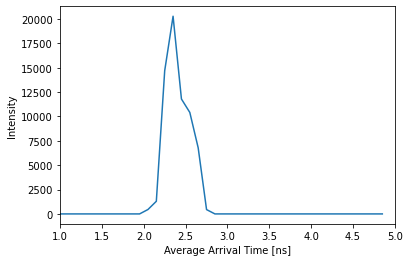

In [14]:
#plot histogram of AAT vs Int check data
ax=sns.lineplot(data=binned.loc[(binned["condition"]=="mcherry-mcitrine"
                                    )&(binned["roi"]=="1")&(binned["embryo"]=="e1"
                                    )],x="aat",y="int")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.set_xlim([1,5])

ax.set(xlabel="Average Arrival Time [ns]", ylabel = "Intensity")

In [15]:
#normalise + average for binned AAT vs int histograms
binned["normalised_per_nucleus"]=binned["int"]/binned.groupby(["nucleus_id"])["int"].transform("max")

binned["normalised_per_nucleus_mean_over_condition"]=binned.groupby(["condition","aat"])["normalised_per_nucleus"].transform("mean")
binned["normalised_per_sample"]=binned["normalised_per_nucleus_mean_over_condition"]/binned.groupby(["condition"])["normalised_per_nucleus_mean_over_condition"].transform("max")

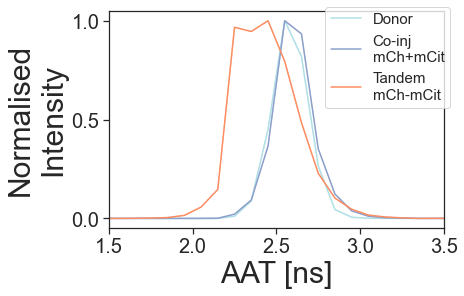

In [16]:
# plot average normalised Intensity vs AAT across nulcei condition

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb",
           "mcitrine":"powderblue"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
hue_order =["mcitrine","mcherry+mcitrine","mcherry-mcitrine"]

#plot
ax=sns.lineplot(data=binned,x="aat",y="normalised_per_sample",hue="condition", 
                hue_order=hue_order, palette=palette, legend=False)

#set x axis tick intervals and font size
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.xticks(fontsize=20)
ax.set_xlim([1.5,3.5])

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.yticks(fontsize=20)

#set x and y axis labels
ax.set_xlabel("AAT [ns]", fontsize=30)
ax.set_ylabel("Normalised\nIntensity",fontsize=30)

#legend
ax.legend(labels=["Donor","Co-inj\nmCh+mCit","Tandem\nmCh-mCit"], title="",
          fontsize=15, bbox_to_anchor=(1.02, 1.02), loc='upper right' , borderaxespad=0)

#save plot
plt.savefig("d1_aat-FRET_binned_histograms.png",dpi=300, bbox_inches='tight')

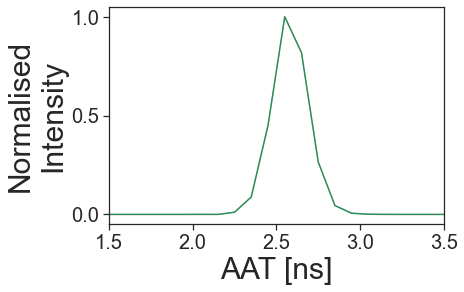

In [17]:
# plot average normalised Intensity vs AAT for mCitrine

#font for graph
sns.set(font="Arial",style="ticks")

#lineplot
ax=sns.lineplot(data=binned.loc[(binned["condition"]=="mcitrine")],x="aat",y="normalised_per_sample", color="seagreen", legend=False)

#set x and y axis labels
ax.set_xlabel("AAT [ns]", fontsize=30)
ax.set_ylabel("Normalised\nIntensity",fontsize=30)

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.yticks(fontsize=20)

#set x axis tick intervals and font size
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.xticks(fontsize=20)
ax.set_xlim([1.5,3.5])

#save plot
plt.savefig("d1_binned_histogram_mcitrine.png",dpi=300, bbox_inches='tight')

In [18]:
binned.to_csv("d1.csv")

In [19]:
binned

,nucleus_id,int,condition,embryo,roi,sample,aat,normalised_per_nucleus,normalised_per_nucleus_mean_over_condition,normalised_per_sample
0,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.05,0.0,0.0,0.0
1,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.15,0.0,0.0,0.0
2,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.25,0.0,0.0,0.0
3,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.35,0.0,0.0,0.0
4,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.45,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
30865,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.45,0.0,0.0,0.0
30866,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.55,0.0,0.0,0.0
30867,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.65,0.0,0.0,0.0
30868,mcitrine_e3_9,0.0,mcitrine,e3,9,mcitrine_e3,4.75,0.0,0.0,0.0


In [20]:
binned = pd.read_csv("d1.csv", usecols=range(1,11))

In [21]:
#calculate lifetime at maximum intensity of each nucleus BINNED
binned["t_max"]=binned.loc[binned.groupby(["nucleus_id"]).int.idxmax(),"aat"]
binned["t_max"]=binned.groupby(["nucleus_id"])["t_max"].transform("max")

In [22]:
# calculate mean weighted lifetime

#calculate maximum intensity of each nucleus
binned["I_max"]=binned.loc[binned.groupby(["nucleus_id"]).int.idxmax(),"int"]
binned["I_max"]=binned.groupby(["nucleus_id"])["I_max"].transform("max")

#first by weighting intensities per lifetime int + summing across each roi
binned["weighted_intensity_per_nucleus"]=binned["int"]/binned["I_max"]
binned["sum_weighted_intensity_per_nucleus"]=binned.groupby(["nucleus_id"])["weighted_intensity_per_nucleus"].transform("sum")

# then by multiplying weighted intensity * lifetime
binned["weighted_intensity*lifetime_per_nucleus"]=binned["weighted_intensity_per_nucleus"]*binned["aat"]
binned["sum_weighted_intensity*lifetime_per_nucleus"]=binned.groupby(["nucleus_id"])["weighted_intensity*lifetime_per_nucleus"].transform("sum")

# mean weighted lifetime per nucleus
binned["mean_weighted_lifetime_per_nucleus"]=binned["sum_weighted_intensity*lifetime_per_nucleus"]/binned["sum_weighted_intensity_per_nucleus"]


In [23]:
#tidy dataframe - drop nucleus duplicates
dfmelt = binned[["nucleus_id","embryo","condition","mean_weighted_lifetime_per_nucleus","I_max","t_max"]].drop_duplicates(subset="nucleus_id")
dfmelt["sample"]=dfmelt["condition"]+"_"+dfmelt["embryo"]
dfmelt

,nucleus_id,embryo,condition,mean_weighted_lifetime_per_nucleus,I_max,t_max,sample
0,mcherry+mcitrine_e1_1,e1,mcherry+mcitrine,2.604380,29084.0,2.65,mcherry+mcitrine_e1
49,mcherry+mcitrine_e1_10,e1,mcherry+mcitrine,2.615982,39563.0,2.65,mcherry+mcitrine_e1
98,mcherry+mcitrine_e1_11,e1,mcherry+mcitrine,2.635770,115948.0,2.65,mcherry+mcitrine_e1
147,mcherry+mcitrine_e1_12,e1,mcherry+mcitrine,2.604696,90218.0,2.65,mcherry+mcitrine_e1
196,mcherry+mcitrine_e1_13,e1,mcherry+mcitrine,2.620723,35994.0,2.65,mcherry+mcitrine_e1
...,...,...,...,...,...,...,...
30625,mcitrine_e3_65,e3,mcitrine,2.604908,18615.0,2.65,mcitrine_e3
30674,mcitrine_e3_66,e3,mcitrine,2.597202,12431.0,2.65,mcitrine_e3
30723,mcitrine_e3_7,e3,mcitrine,2.586649,40318.0,2.55,mcitrine_e3
30772,mcitrine_e3_8,e3,mcitrine,2.585476,90313.0,2.55,mcitrine_e3


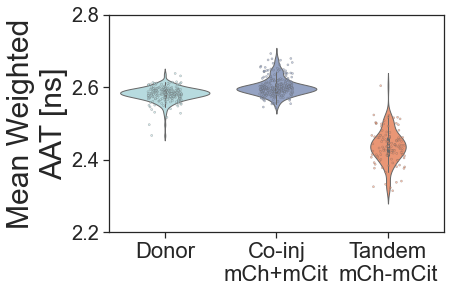

In [24]:
# plot mean weighted lifetime across nulcei for each condition

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb",
           "mcitrine":"powderblue"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
order =["mcitrine","mcherry+mcitrine","mcherry-mcitrine"]

#violin and scatterplots
ax=sns.violinplot(data=dfmelt, x="condition",y="mean_weighted_lifetime_per_nucleus", order=order,
                  marker="o", alpha=0.5,  size = 2, linewidth=1, palette=palette)


ax=sns.stripplot(data=dfmelt, x="condition",y="mean_weighted_lifetime_per_nucleus", order=order,
                 marker="o", alpha=0.5, jitter = 0.15, size = 2, linewidth=0.5, palette=palette)


#set x and y axis labels
ax.set_ylabel("Mean Weighted\nAAT [ns]",fontsize=30)
ax.set_xlabel("")

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.yticks(fontsize=20)
ax.set(ylim=(2.2,2.8))

# set x axis tick labels
ax.set_xticklabels(["Donor", "Co-inj\nmCh+mCit","Tandem\nmCh-mCit"], fontsize = 22)

#save plot

plt.savefig("d1_aat-FRET_mwAAT.png",dpi=300, bbox_inches='tight')

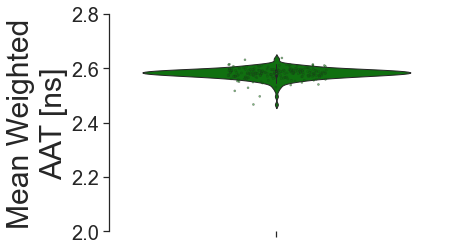

In [25]:
# plot mean weighted lifetime across nulcei for mcitrine

#font for graph
sns.set(font="Arial",style="ticks")


#violin and scatterplots
ax=sns.violinplot(data=dfmelt.loc[(dfmelt["condition"]=="mcitrine")], x="condition",y="mean_weighted_lifetime_per_nucleus", 
                  marker="o", alpha=0.5,  size = 2, linewidth=1, color="green", height = 6, aspect = 1.3,)


ax=sns.stripplot(data=dfmelt.loc[(dfmelt["condition"]=="mcitrine")], x="condition",y="mean_weighted_lifetime_per_nucleus",
                 marker="o", alpha=0.5, jitter = 0.15, size = 2, linewidth=0.5, color="green")


#set x and y axis labels
ax.set_ylabel("Mean Weighted\nAAT [ns]",fontsize=30)
ax.set_xlabel("")

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.yticks(fontsize=20)
ax.set(ylim=(2.0,2.8))


# set x axis tick labels
ax.set_xticklabels("")

sns.despine(trim=True)

#save plot

plt.savefig("d1_mcit_mwAAT.png",dpi=300, bbox_inches='tight')

In [27]:
dfmelt.to_csv("d1_aat.csv")